In [1]:
from glob import glob
import pathlib

from polyphys.manage import organizer
from polyphys.manage.parser import SumRule

import MDAnalysis as mda
import maicos
import matplotlib.pyplot as plt

/Users/amirhsi_mini/opt/anaconda3/envs/polyLab/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
/Users/amirhsi_mini/opt/anaconda3/envs/polyLab/lib/python3.9/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


In [7]:
path = pathlib.Path('/Users/amirhsi_mini/trjs/N500D10.0ac0.8-trjs')
#path = pathlib.Path('../test_data/trjs-continuous/N500D10.0ac0.8-trjs')
path = path.resolve() # convert relative path to aabsolute one
input_database = str(path)
geometry = 'biaxial'
group = 'all'
hierarchy = '/N*/N*'
observations = glob(input_database + hierarchy)
# 'bug' time series and historams
topologies = organizer.sort_filenames(observations, fmts=['.all.data'])
trajectories = organizer.sort_filenames(observations, fmts=['.all.lammpstrj'])
# 'bug' time series and historams
sim_real_dt = 1000 * 0.002 * 1

In [8]:
print(topologies[0][0])
print(trajectories[1][0])

cell = mda.Universe(
        topologies[0][0],
        trajectories[1][0],
        topology_format='DATA',
        format='LAMMPSDUMP',
        lammps_coordinate_convention='unscaled',
        atom_style="id resid type x y z",
        dt=sim_real_dt
    )
sim_info = SumRule(topologies[0][0], geometry='biaxial', group='all',lineage='whole')

/Users/amirhsi_mini/trjs/N500D10.0ac0.8-trjs/N500epsilon5.0r5.5lz205.5sig0.8nc12012dt0.002bdump1000adump5000ens1/N500epsilon5.0r5.5lz205.5sig0.8nc12012dt0.002bdump1000adump5000ens1.all.data
/Users/amirhsi_mini/trjs/N500D10.0ac0.8-trjs/N500epsilon5.0r5.5lz205.5sig0.8nc12012dt0.002bdump1000adump5000ens1/N500epsilon5.0r5.5lz205.5sig0.8nc12012dt0.002bdump1000adump5000ens1.j02.all.lammpstrj


In [9]:
bug = cell.select_atoms('resid 1')  # monomers
bug_dplan = maicos.density_planar(bug,dens='number',center=True, dim=2,binwidth=0.04, verbose=True)
bug_dplan.run()
crds = cell.select_atoms('resid 0')  # crowders
crds_dplan = maicos.density_planar(crds,dens='number',center=True, dim=2,binwidth=0.04, verbose=True)
crds_dplan.run()

/Users/amirhsi_mini/opt/anaconda3/envs/polyLab/lib/python3.9/site-packages/maicos/utils.py:65: UserWarning: Cannot use 'molecules'. Falling back to 'fragments'
  warnings.warn("Cannot use 'molecules'. Falling back to 'fragments'")


Using 1028 bins.
Computing number density profile along Z-axes.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:20<00:00, 49.70it/s]
/Users/amirhsi_mini/opt/anaconda3/envs/polyLab/lib/python3.9/site-packages/maicos/utils.py:65: UserWarning: Cannot use 'molecules'. Falling back to 'fragments'
  warnings.warn("Cannot use 'molecules'. Falling back to 'fragments'")


Using 1028 bins.
Computing number density profile along Z-axes.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:21<00:00, 46.60it/s]


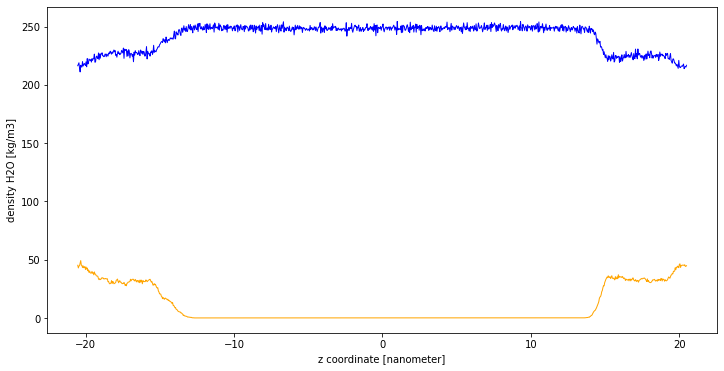

In [10]:
fig = plt.figure(figsize = (12,6))
plt.plot(bug_dplan.results['z'],bug_dplan.results['dens_mean'],linewidth=1,c='orange')
plt.plot(crds_dplan.results['z'],crds_dplan.results['dens_mean'],linewidth=1,c='blue')
plt.xlabel("z coordinate [nanometer]")
plt.ylabel("density H2O [kg/m3]")
plt.show()